In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# in the above Scores dataset we have 25 rows and 2 columns 
# 1st column is hour  and datatype is float and sencond column is scores and datatype is integer

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Feature creation: creating new features from the existing data that can provide additional information to the model.

In [6]:
def getgrade(marks):
    if marks>=75:
        return "A"
    elif marks<75 and marks>=60:
        return "B"
    elif marks<60 and marks>=35:
        return "C"
    else:
        return "F"

In [7]:
df["Grade"]=df["Scores"].apply(getgrade)

In [8]:
df

,Hours,Scores,Grade
0,2.5,21,F
1,5.1,47,C
2,3.2,27,F
3,8.5,75,A
4,3.5,30,F
5,1.5,20,F
6,9.2,88,A
7,5.5,60,B
8,8.3,81,A
9,2.7,25,F


In [9]:
df.Grade.value_counts()

F    9
A    7
C    5
B    4
Name: Grade, dtype: int64

<AxesSubplot:>

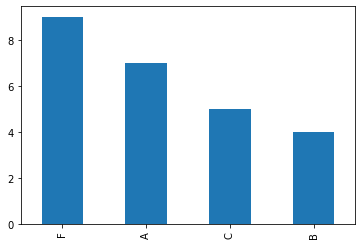

In [10]:
df.Grade.value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Grade'>

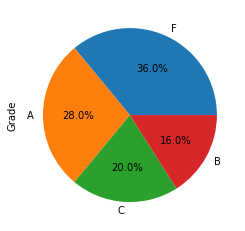

In [11]:
df.Grade.value_counts().plot(kind="pie",autopct="%1.1f%%")

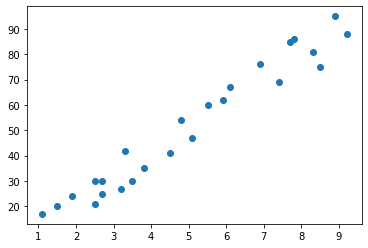

In [12]:
plt.scatter(df["Hours"],df["Scores"])

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# split the data inot x and y

In [14]:
x=df.iloc[:,:-2]
y=df.iloc[:,-2]

In [15]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [16]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [19]:
linreg.coef_

array([10.46110829])

In [20]:
linreg.intercept_

-1.5369573315500702

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest,ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest,ypred)

print(f"MAE :- {mae}\n MSE :- {mse}\n RMSE :- {rmse}\n Accuracy:- {r2}")

MAE :- 7.882398086270432
 MSE :- 68.88092074277635
 RMSE :- 8.299453038771674
 Accuracy:- 0.8421031525243527


# Model Testing On New Observation

In [22]:
def makeprediction():
    newob = float(input("Enter No of Hrs You Study:- "))
    yp = linreg.predict([[newob]])[0]
    print(f"If You Study of {newob} hrs, you will score around {yp:.2f} marks")
    return yp

In [23]:
makeprediction()

Enter No of Hrs You Study:- 7
If You Study of 7.0 hrs, you will score around 71.69 marks


71.69080072348314